In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data_test = pd.read_csv("/Users/ZHAOFENG SHANG/Desktop/NoteBook/Kaggle_Titanic/test.csv")

In [3]:
train = pd.read_csv('/Users/ZHAOFENG SHANG/Desktop/NoteBook/PriceSuggestion/train.tsv', delimiter='\t', encoding='utf-8')
test = pd.read_csv('/Users/ZHAOFENG SHANG/Desktop/NoteBook/PriceSuggestion/test.tsv', delimiter='\t', encoding='utf-8')

In [4]:
id_list = test["test_id"]

In [5]:
train=train.drop(['train_id'],axis=1)
test=test.drop(['test_id'],axis=1)


In [6]:
train.tail()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...
1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,NaN,22.0,0,"New with tag, red with sparkle. Firm price, no..."


In [7]:
l=[i for i in range(25000,1482535)]
train=train.drop(index=l)

In [8]:
train.to_csv('train_small.csv')

# missing value 

# deal with item_description

In [9]:
train[train.item_description.isnull()].shape[0]
# 4 null in item_description

0

In [10]:
train[train.item_description=='No description yet'].shape[0]
# NO description yet is the same as null,  could change them into one word 'NULL'

1392

In [11]:
train.loc[train['item_description']=='No description yet','item_description']='NULL'
test.loc[test['item_description']=='No description yet','item_description']='NULL'
train.loc[train['item_description'].isnull(), 'item_description'] = 'NULL'
test.loc[train['item_description'].isnull(), 'item_description'] = 'NULL'

IndexingError: (0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
24970    False
24971    False
24972    False
24973    False
24974    False
24975    False
24976    False
24977    False
24978    False
24979    False
24980    False
24981    False
24982    False
24983    False
24984    False
24985    False
24986    False
24987    False
24988    False
24989    False
24990    False
24991    False
24992    False
24993    False
24994    False
24995    False
24996    False
24997    False
24998    False
24999    False
Name: item_description, Length: 25000, dtype: bool, 'item_description')

In [20]:
train[train.item_description=='No description yet'].shape[0]

0

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 7 columns):
name                 25000 non-null object
item_condition_id    25000 non-null int64
category_name        24880 non-null object
brand_name           14257 non-null object
price                25000 non-null float64
shipping             25000 non-null int64
item_description     25000 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [22]:
# create a new attribute " the number of item_description words"
train['description_counts'] = train['item_description'].str.split().apply(len)

In [23]:
Q=train['description_counts'].describe()
Q

count    25000.000000
mean        25.731120
std         30.661539
min          1.000000
25%          7.000000
50%         15.000000
75%         31.000000
max        222.000000
Name: description_counts, dtype: float64

In [24]:
df=pd.DataFrame([[Q['25%'],Q['50%'],Q['75%']]],columns=['a','b','c'])
df

,a,b,c
0,7.0,15.0,31.0


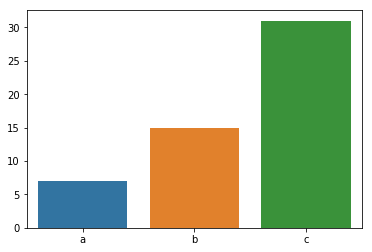

In [25]:
sns.barplot(data=df)

# Name

In [26]:
train['name'].str.split().apply(len).describe()
# find that mean of name is 4 

count    25000.000000
mean         4.400480
std          1.648722
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: name, dtype: float64

# Brand_name

In [27]:
train[train.brand_name.notnull()]['brand_name'].str.split().apply(len).describe()

count    14257.000000
mean         1.514484
std          0.714177
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: brand_name, dtype: float64

In [28]:
b=train[train.brand_name.notnull()]['brand_name'].str.split().apply(len)
b

1        1
2        1
6        2
7        1
8        1
10       1
11       2
12       1
13       1
14       2
15       1
16       3
18       2
19       1
20       1
21       2
22       1
24       2
25       2
26       1
27       1
28       2
29       1
30       2
32       1
33       1
37       2
38       1
39       2
40       2
        ..
24944    2
24947    1
24950    2
24951    1
24952    1
24955    1
24958    2
24959    2
24960    1
24962    1
24963    1
24966    1
24967    4
24971    1
24973    2
24975    2
24976    2
24980    1
24981    1
24982    3
24983    1
24985    2
24986    1
24987    2
24991    1
24993    1
24994    2
24995    1
24996    1
24999    1
Name: brand_name, Length: 14257, dtype: int64

In [29]:
train[train.brand_name.notnull()]['brand_name'].str.split().apply(len).value_counts()
# lots of has 1-2 words

1    8406
2    4732
3     759
4     356
5       3
6       1
Name: brand_name, dtype: int64

# Item_condition_id

In [30]:
# the condition is from 1-5 , 1 is the best.

In [31]:
train.item_condition_id.value_counts()

1    10886
3     7275
2     6241
4      554
5       44
Name: item_condition_id, dtype: int64

In [32]:
train.groupby('item_condition_id').mean()

,price,shipping,description_counts
item_condition_id,,,
1,26.605043,0.568528,31.689234
2,27.807082,0.379587,20.118571
3,27.452646,0.340893,21.757938
4,22.599278,0.319495,23.944043
5,24.250000,0.454545,27.159091


In [33]:
d = train.groupby('item_condition_id')
d.describe()['price']
#   condition 1        5
#     count    640549    2384
#     mean     26         31
#     median   18         19
#     std      35         39
#  should reconsider about the condition    
    

,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,10886.0,26.605043,38.094660,0.0,10.0,17.0,30.0,1206.0
2,6241.0,27.807082,42.034963,0.0,11.0,17.0,29.0,859.0
3,7275.0,27.452646,46.512933,0.0,11.0,16.0,28.0,1506.0
4,554.0,22.599278,24.237188,3.0,10.0,15.0,26.0,240.0
5,44.0,24.250000,22.205305,3.0,11.0,20.0,24.0,115.0


# Category_name


In [34]:
# category_name         1476208 non-null object   This attribute has some missing value

In [35]:
train['cate_slash'] = train['category_name'].str.count('/')
train['cate_slash'].value_counts()

2.0    24810
4.0       50
3.0       20
Name: cate_slash, dtype: int64

In [36]:
# a=train[train['brand_name'].notnull()].brand_name.str.split().apply(len)
# a.value_counts()

In [37]:
train[['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']] = train['category_name'].str.split('/', expand=True)

In [38]:
for value in ['cat_1','cat_2', 'cat_3', 'cat_4', 'cat_5']:
    print(" {} contains unique values {}".format(value,len(train[value].unique())))

 cat_1 contains unique values 11
 cat_2 contains unique values 109
 cat_3 contains unique values 581
 cat_4 contains unique values 6
 cat_5 contains unique values 3


In [39]:
train.cat_1.value_counts()

Women                     11189
Beauty                     3656
Kids                       2828
Electronics                2086
Men                        1529
Home                       1093
Vintage & Collectibles      798
Other                       794
Handmade                    495
Sports & Outdoors           412
Name: cat_1, dtype: int64

In [40]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description_counts,cate_slash,cat_1,cat_2,cat_3,cat_4,cat_5
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,NULL,1,2.0,Men,Tops,T-shirts,None,None
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,36,2.0,Electronics,Computers & Tablets,Components & Parts,None,None
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,29,2.0,Women,Tops & Blouses,Blouse,None,None
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,32,2.0,Home,Home Décor,Home Décor Accents,None,None
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,5,2.0,Women,Jewelry,Necklaces,None,None


In [41]:
train.cat_2.value_counts()[0:10]
# top 10

Makeup                       2233
Athletic Apparel             2175
Shoes                        1745
Tops & Blouses               1745
Jewelry                      1059
Toys                          933
Cell Phones & Accessories     923
Women's Handbags              798
Dresses                       778
Women's Accessories           708
Name: cat_2, dtype: int64

In [42]:
# Top 10 of cat_3
train.cat_3.value_counts()[:10]

Pants, Tights, Leggings    1010
Face                        878
Other                       877
T-Shirts                    767
Lips                        581
Shoes                       544
Games                       504
Athletic                    480
Eyes                        474
Cases, Covers & Skins       435
Name: cat_3, dtype: int64

In [43]:
condition=train.groupby('item_condition_id')['cat_1'].value_counts(normalize=True)
condition=condition.rename('number').reset_index() # because the number column is attached on cat_1, when
# reset_index, the number column is empty, cannot become cat_1, so should first rename, then ad
condition

,item_condition_id,cat_1,number
0,1,Women,0.348595
1,1,Beauty,0.247351
2,1,Kids,0.090465
3,1,Electronics,0.084109
4,1,Home,0.064671
5,1,Other,0.045509
6,1,Men,0.043482
7,1,Handmade,0.029756
8,1,Vintage & Collectibles,0.028282
9,1,Sports & Outdoors,0.017780


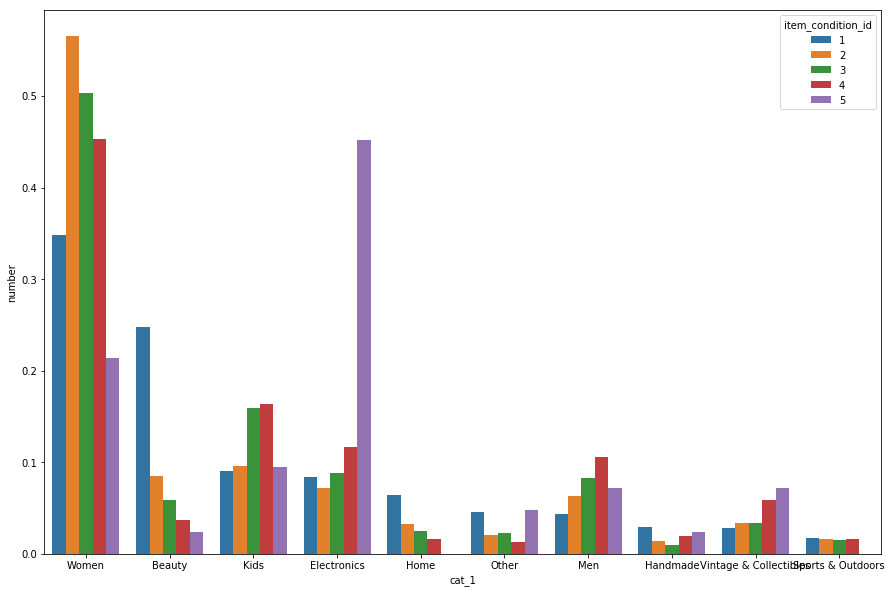

In [44]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="cat_1", y="number", hue="item_condition_id", data=condition)
plt.show()

# Shipping

In [45]:
# 0 is no pay for shipping

In [46]:
# 45% of all records have shipping equal to 1.
train.shipping.mean()

0.44940000000000002

# Target variable


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 14 columns):
name                  25000 non-null object
item_condition_id     25000 non-null int64
category_name         24880 non-null object
brand_name            14257 non-null object
price                 25000 non-null float64
shipping              25000 non-null int64
item_description      25000 non-null object
description_counts    25000 non-null int64
cate_slash            24880 non-null float64
cat_1                 24880 non-null object
cat_2                 24880 non-null object
cat_3                 24880 non-null object
cat_4                 70 non-null object
cat_5                 50 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 2.5+ MB


In [48]:
# above, price has no missing value
train['price'].describe()

count    25000.000000
mean        27.058860
std         41.436699
min          0.000000
25%         10.000000
50%         17.000000
75%         29.000000
max       1506.000000
Name: price, dtype: float64

In [49]:
train[train.price == 0].shape[0]
# those has zero price

18

In [50]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description_counts,cate_slash,cat_1,cat_2,cat_3,cat_4,cat_5
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,NULL,1,2.0,Men,Tops,T-shirts,None,None
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,36,2.0,Electronics,Computers & Tablets,Components & Parts,None,None
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,29,2.0,Women,Tops & Blouses,Blouse,None,None
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,32,2.0,Home,Home Décor,Home Décor Accents,None,None
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,5,2.0,Women,Jewelry,Necklaces,None,None


# Item description

In [12]:
import string
from nltk.corpus import stopwords
def wordCount(text):
    try:
        if text == 'NULL':
            return 0
        else:
            text = text.lower()
            nonpunc = [char for char in text if char not in string.punctuation]
            nonpunc = ''.join(nonpunc)# add every words together into str
            nonpunc=nonpunc.split()
            words = [w for w in nonpunc if not w in stopwords.words('english') and len(w)>3]
            return len(words)
    except: 
        return 0

In [13]:
train['desc_len'] = train['item_description'].apply(lambda x: wordCount(x))
#test['desc_len'] = test['item_description'].apply(lambda x: wordCount(x))

In [14]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,NULL,0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,14
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,10
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,14
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3


In [15]:
train.to_csv('train_small2.csv')

In [17]:
train.to_csv('train_small2.tsv')